In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats.mstats import pearsonr as corr, spearmanr as rho
import matplotlib
import matplotlib.pyplot as plt

**Reading data**

In [3]:
data = pd.read_csv('data.tsv', sep='\t')

In [4]:
data.head(5)

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


In [5]:
data.columns = ['NAME', 'TYPE', 'SAT', 'ACCEPTED_PCT', 'PRICE', 'TOP_10', 'PHD_PCT', 'GRADUATED_PCT']

In [6]:
lib_arts = data[data.TYPE == 'Lib Arts'].drop('TYPE', axis=1)
univ = data[data.TYPE == 'Univ'].drop('TYPE', axis=1)

In [12]:
def z_transform(sample):
    return (sample - sample.mean()) / sample.std()

def filter_outliers(df):
    for col in df.columns:
        if col not in ['TYPE', 'NAME']:
            z_transformed = abs(z_transform(df[col]))
            df = df[z_transformed <= 3]
    return df


def check_is_normal(sample, p):
    p_value = stats.shapiro(sample)[1]
    return p_value > p, p_value


def print_correlations(data, p):
    for col1 in data.columns:
        for col2 in data.columns:
            if col1 != col2 and col1 > col2 and col1 not in ['TYPE', 'NAME'] and col2 not in ['TYPE', 'NAME']:
                is_normal_1, p_value_1 = check_is_normal(data[col1], p)
                is_normal_2, p_value_2 = check_is_normal(data[col2], p)
                if is_normal_1 and is_normal_2:
                    name = 'Pearson'
                    correlation = corr(data[col1], data[col2])[0]
                else:
                    name = 'Spearman'
                    correlation = rho(data[col1], data[col2])[0]
                if abs(correlation) > 0.5:
                    print('{} correlation coefficient between {} and {}: {} '
                          .format(name, col1, col2, corr(data[col1], data[col2])[0]))
                    plt.scatter(data[col1], data[col2])
                    plt.title('{} & {}'.format(col1, col2))
                    plt.show()

    
def describe_data(data, p):
    cols = [col for col in data.columns if col not in ['TYPE', 'NAME']]
    for col in cols:
            is_normal, p_value = check_is_normal(data[col], p)
            if is_normal:
                print('{} : distributed normally with p-value = {} > {}\n'.format(col, p_value, p))
            else:
                print('{} : not distributed normally (p-value = {} < {})\n'.format(col, p_value, p))
            stats.probplot(data[col], plot=plt)
            plt.title('QQ-plot for {}'.format(col))
            plt.show()

In [8]:
univ = filter_outliers(univ)
lib_arts = filter_outliers(lib_arts)

**General statisitics**

In [9]:
univ.describe()

,SAT,ACCEPTED_PCT,PRICE,TOP_10,PHD_PCT,GRADUATED_PCT
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1264.869565,34.739130,35684.739130,81.478261,94.173913,83.043478
std,75.088617,14.197367,12122.180501,11.927316,5.749721,9.082842
min,1109.000000,17.000000,19365.000000,52.000000,79.000000,61.000000
25%,1221.500000,24.000000,25465.500000,77.000000,92.000000,76.500000
50%,1280.000000,30.000000,35804.000000,85.000000,96.000000,86.000000
75%,1318.500000,44.000000,42881.000000,90.000000,98.500000,90.000000
max,1370.000000,64.000000,61921.000000,96.000000,100.000000,95.000000


In [10]:
lib_arts.describe()

,SAT,ACCEPTED_PCT,PRICE,TOP_10,PHD_PCT,GRADUATED_PCT
count,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,1256.640000,40.560000,21755.560000,67.240000,88.24000,84.120000
std,43.673867,12.516922,3455.726444,10.802315,6.66008,6.091798
min,1170.000000,22.000000,17520.000000,47.000000,75.00000,72.000000
25%,1230.000000,33.000000,18872.000000,61.000000,82.00000,80.000000
50%,1255.000000,38.000000,20377.000000,68.000000,90.00000,85.000000
75%,1290.000000,49.000000,24718.000000,76.000000,93.00000,88.000000
max,1336.000000,67.000000,27879.000000,86.000000,98.00000,93.000000


After looking at the general statistics, we can say that in general the two sets of institues mostly differ in:

1) PRICE and TOP_10 - Liberal art schools have much lower mean price and the prices are distributed more densely than in case of the Universities, which tend to have higher prices in average and those prices are distributed much wider.

2) SAT values in Liberal art schools and in Universities have the same mean value, but in case of the Liberal art schools SAT is distributed much denser, which gives us the idea that the SAT value doesn't really play a big role in the choice of the art school for the students.

SAT : distributed normally with p-value = 0.371493935585022 > 0.05



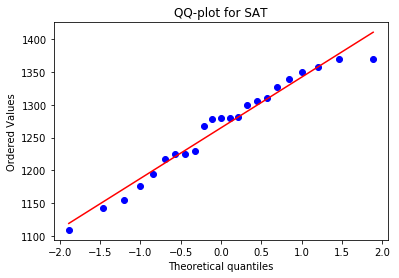

ACCEPTED_PCT : distributed normally with p-value = 0.07479183375835419 > 0.05



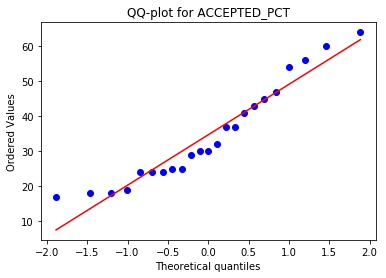

PRICE : distributed normally with p-value = 0.2785978615283966 > 0.05



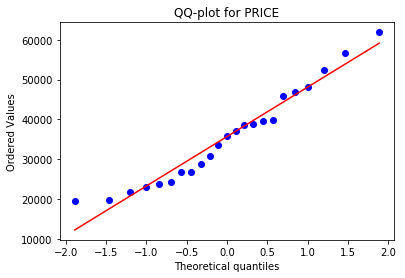

TOP_10 : not distributed normally (p-value = 0.011292506009340286 < 0.05)



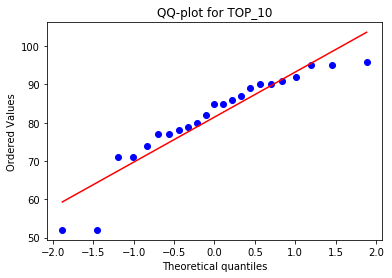

PHD_PCT : not distributed normally (p-value = 0.005495925899595022 < 0.05)



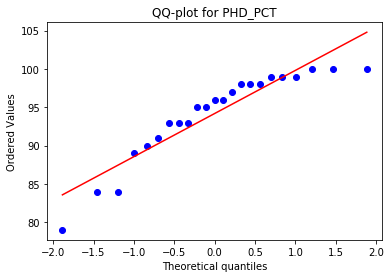

GRADUATED_PCT : not distributed normally (p-value = 0.048941608518362045 < 0.05)



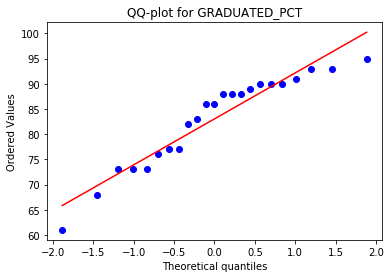

In [11]:
describe_data(univ, p=0.05)

SAT : distributed normally with p-value = 0.8171436190605164 > 0.05



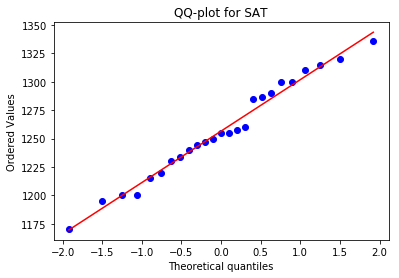

ACCEPTED_PCT : distributed normally with p-value = 0.33980199694633484 > 0.05



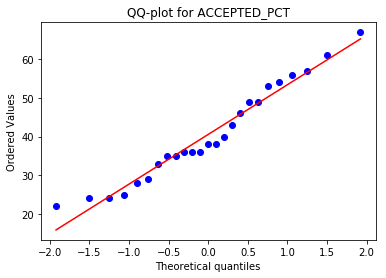

PRICE : not distributed normally (p-value = 0.026016557589173317 < 0.05)



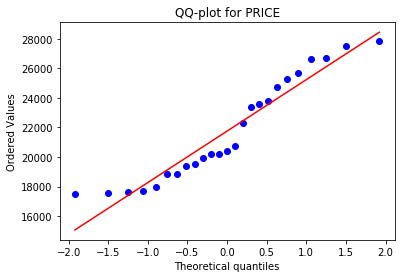

TOP_10 : distributed normally with p-value = 0.6672059297561646 > 0.05



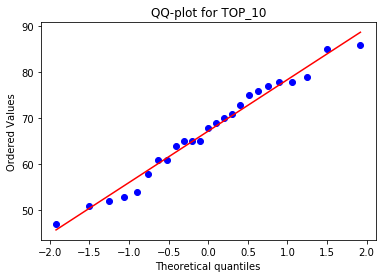

PHD_PCT : distributed normally with p-value = 0.2353450208902359 > 0.05



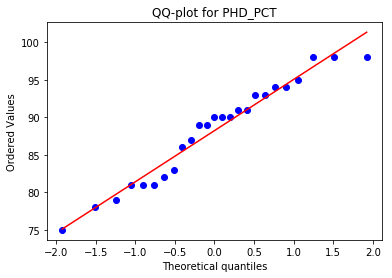

GRADUATED_PCT : distributed normally with p-value = 0.3041570782661438 > 0.05



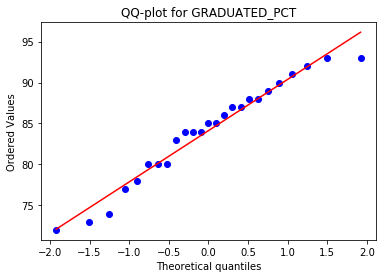

In [12]:
describe_data(lib_arts, p=0.05)

SAT : distributed normally with p-value = 0.9981370568275452 > 0.05



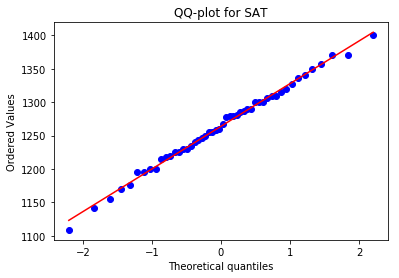

ACCEPTED_PCT : distributed normally with p-value = 0.07482080161571503 > 0.05



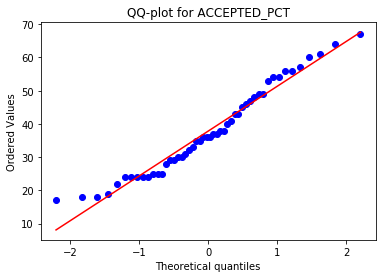

PRICE : not distributed normally (p-value = 4.333724845650977e-08 < 0.05)



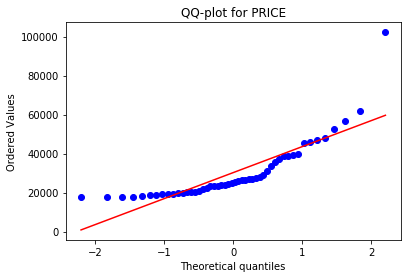

TOP_10 : distributed normally with p-value = 0.18322163820266724 > 0.05



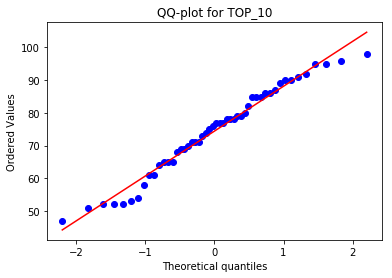

PHD_PCT : not distributed normally (p-value = 7.882166391937062e-05 < 0.05)



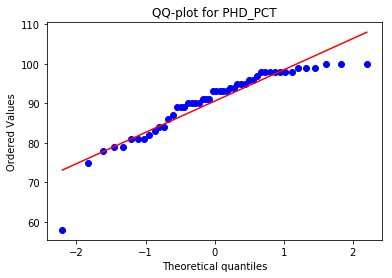

GRADUATED_PCT : not distributed normally (p-value = 0.012669116258621216 < 0.05)



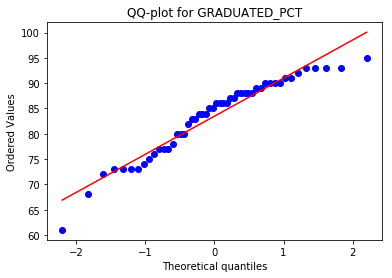

In [13]:
describe_data(data, p=0.05)

**Correlations between the parameters**

Universities:

Pearson correlation coefficient between SAT and ACCEPTED_PCT: -0.6121780937837494 


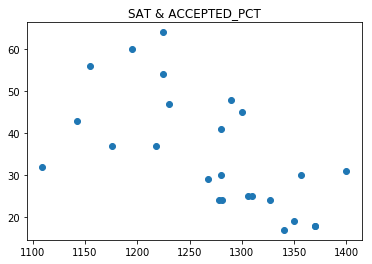

Spearman correlation coefficient between SAT and PRICE: 0.6907159476526774 


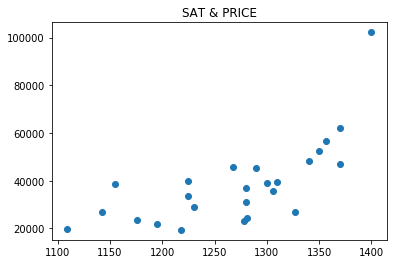

Pearson correlation coefficient between SAT and GRADUATED_PCT: 0.6516830156096173 


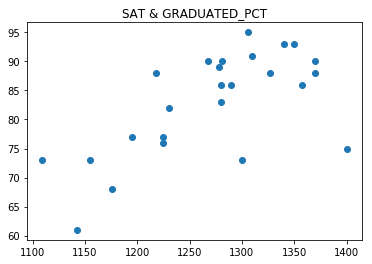

Spearman correlation coefficient between TOP_10 and ACCEPTED_PCT: -0.7206575325674712 


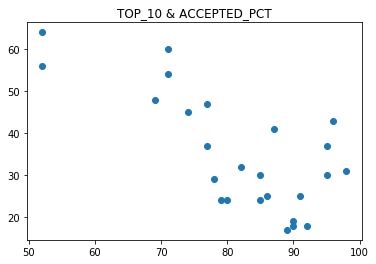

Pearson correlation coefficient between GRADUATED_PCT and ACCEPTED_PCT: -0.6279905107153535 


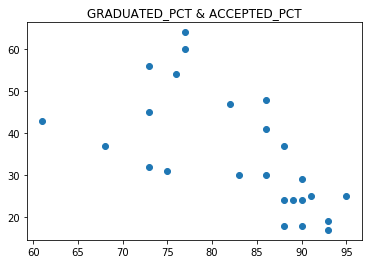

In [13]:
print_correlations(univ, 0.05)

Liberal art schools:

Pearson correlation coefficient between SAT and ACCEPTED_PCT: -0.6168462975215037 


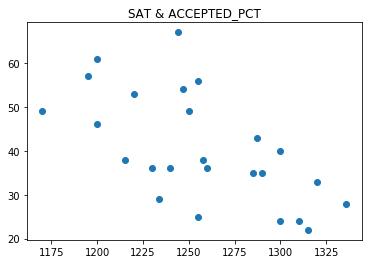

Pearson correlation coefficient between TOP_10 and SAT: 0.7463030602259074 


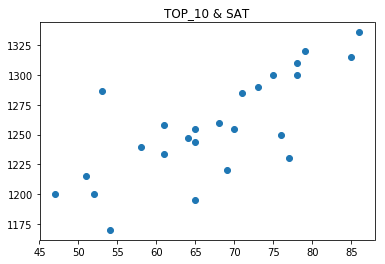

Pearson correlation coefficient between GRADUATED_PCT and ACCEPTED_PCT: -0.5544658970685749 


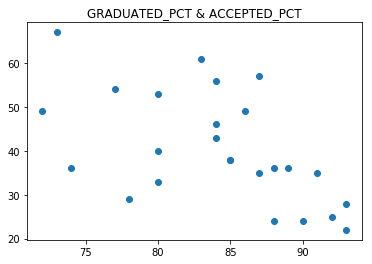

In [15]:
print_correlations(lib_arts, 0.05)

**Conlusions:**

1) We found out that the median SAT value and the percent of the accepted students negatively correlate in both cases. This is logical, since the lower the percent of the accepted student - the higher the expected academic scores from the future students.

2) In case of the Universities, SAT and the price seem to correlate, which is explainable as well, since the higher median SAT means higher average level of students, which requires higher level of education. This leads us to the idea, that the higher level of education requires more qualified personel.


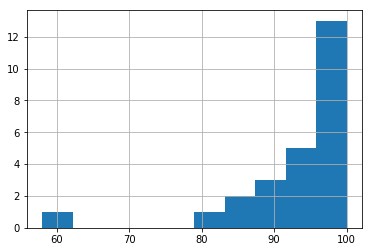

In [22]:
univ.PHD_PCT.hist()

But here we see that in general most of the universities have higher than 90% of PhD degrees among the faculty. 

The lack of such correlation in case of the Liberal Art schools can be explained by the fact that SAT includes maths test, which is pretty unrepresentative in case of the art students, their skills are hard to evaluate through this test.

3) Again, in case of the Universities only (the same explanation as above can be used in case of the Liberal Art schools) SAT and the percent of the graduated students seem to correlate. This can be explained through the idea that the higher scores the school-graduated students have, the higher is their motivation to study and graduate from the university.

4) The next correlation, the negative correlation between the percent of graduated students and the accepted students (even though it is pretty low in case of the liberal art schools, it is still visible), can be explained with the same idea as the previous one: the harder it is to be accepted in some institution, the higher will be the motivation of the students to finish it. 